Ref. Lecture material by Dr. Y. Kawanishi 

Adjusting for google colab 

# Character recognition on Support Vector Machine (SVM) 
Handwriting recognition using the MNIST dataset 

In [1]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 7.1 MB/s 


In [2]:
!pip install -q "tqdm>=4.36.1"

import tensorflow as tf
import tensorflow_addons as tfa

In [3]:
# new version, 1/Nov/2021
import tqdm

# quietly deep-reload tqdm
import sys
from IPython.lib import deepreload 

stdout = sys.stdout
sys.stdout = open('junk','w')
deepreload.reload(tqdm)
sys.stdout = stdout

tqdm.__version__

'4.62.3'

In [4]:
!pip install numpy
!pip install matplotlib

In [5]:
#from sklearn.datasets import fetch_mldata # version <= 0.21
from sklearn.datasets import fetch_openml # version >= 0.22
from sklearn.model_selection import train_test_split

In [6]:
#from sklearn.svm import LinearSVC as Classifier
from sklearn.ensemble import RandomForestClassifier as Classifier
#from sklearn.ensemble import AdaBoostClassifier as Classifier

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [8]:
#mnist = fetch_mldata("MNIST original", data_home=".")
mnist_X, mnist_y = fetch_openml('mnist_784', version=1, data_home=".", return_X_y=True)
#data = np.asarray(mnist.data, np.float32)
x_all = mnist_X.astype(np.float32) / 255
y_all = mnist_y.astype(np.int32)
#data_train, data_test, label_train, label_test = train_test_split(data, mnist.target, test_size=0.2)
data_train, data_test, label_train, label_test = train_test_split(x_all,y_all, test_size=0.2, random_state=42)

In [9]:
classifier = Classifier()
classifier.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
result = classifier.predict(data_test)

In [11]:
cmat = confusion_matrix(label_test, result)
print(cmat)

[[1324    0    5    0    2    3    2    1    6    0]
 [   0 1578    7    7    2    1    0    2    2    1]
 [   5    3 1338    3    4    1    8    8    8    2]
 [   1    0   21 1360    1   10    2   14   14   10]
 [   2    0    3    0 1259    1    4    3    1   22]
 [   1    2    3   18    3 1224    9    1   10    2]
 [   5    1    0    0    7    8 1374    0    1    0]
 [   2    6   15    0    8    0    0 1453    5   14]
 [   0    8   10   12    5    7    6    5 1296    8]
 [   3    7    3   16   18    5    1   11    6 1350]]


In [12]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(label_test, result)
print(acc)

0.9682857142857143


# Confirmation of characters 
One piece of MNIST data can be converted to image data by passing through the following function.

In [13]:
def to_image(feat):
    return feat.reshape(28, 28)

In [14]:
img = to_image(data_test[50])

In [15]:
%matplotlib inline
import matplotlib.pylab as plt

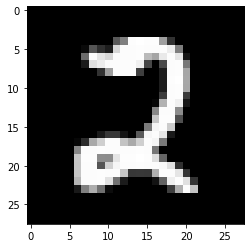

In [16]:
plt.imshow(img, cmap="gray")

plt.show()

In [17]:
classifier.predict([data_test[50]])

array([2], dtype=int32)


# Deep Learning

In [18]:
#from sklearn.datasets import fetch_mldata # version <= 0.21
from sklearn.datasets import fetch_openml # version >= 0.22
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.utils.np_utils import to_categorical

In [19]:
#mnist = fetch_mldata("MNIST original", data_home=".")
mnist_X, mnist_y = fetch_openml('mnist_784', version=1, data_home=".", return_X_y=True)
#data = np.asarray(mnist.data, np.float32)
x_all = mnist_X.astype(np.float32) / 255
y_all = mnist_y.astype(np.int32)
#data_train, data_test, label_train, label_test = train_test_split(data, mnist.target, test_size=0.2)
data_train, data_test, label_train, label_test = train_test_split(x_all,y_all, test_size=0.2, random_state=42)

In [20]:
label_train_category = to_categorical(label_train)
label_test_category = to_categorical(label_test)

In [21]:
model = Sequential()

model.add(Dense(100, input_dim=784))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# old version

#from keras_tqdm import TQDMNotebookCallback

#model.fit(data_train, label_train_category, epochs=20, batch_size=100, validation_split=0.1, verbose=0, callbacks=[TQDMNotebookCallback(leave_inner=True)])

In [23]:
# new version, 1/Nov/2021

# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

# train the model with tqdm_callback
# make sure to set verbose = 0 to disable
# the default progress bar.

# model.fit(x_train, y_train,
model.fit(data_train, label_train_category, 
          batch_size=100,
          epochs=20,
          verbose=0,
          callbacks=[tqdm_callback],
          #validation_data=(x_test, y_test)
          validation_split=0.1,
          )

Training:   0%|           0/20 ETA: ?s,  ?epochs/s

Epoch 1/20


0/504           ETA: ?s - 

Epoch 2/20


0/504           ETA: ?s - 

Epoch 3/20


0/504           ETA: ?s - 

Epoch 4/20


0/504           ETA: ?s - 

Epoch 5/20


0/504           ETA: ?s - 

Epoch 6/20


0/504           ETA: ?s - 

Epoch 7/20


0/504           ETA: ?s - 

Epoch 8/20


0/504           ETA: ?s - 

Epoch 9/20


0/504           ETA: ?s - 

Epoch 10/20


0/504           ETA: ?s - 

Epoch 11/20


0/504           ETA: ?s - 

Epoch 12/20


0/504           ETA: ?s - 

Epoch 13/20


0/504           ETA: ?s - 

Epoch 14/20


0/504           ETA: ?s - 

Epoch 15/20


0/504           ETA: ?s - 

Epoch 16/20


0/504           ETA: ?s - 

Epoch 17/20


0/504           ETA: ?s - 

Epoch 18/20


0/504           ETA: ?s - 

Epoch 19/20


0/504           ETA: ?s - 

Epoch 20/20


0/504           ETA: ?s - 

In [24]:
# old version
#result = model.predict_classes(data_test, verbose=1)

In [25]:
# new version, 1/Nov/2021
predict_prob = model.predict(data_test)
result = np.argmax(predict_prob,axis=1)

In [26]:
cmat = confusion_matrix(label_test, result)
print(cmat)

[[1317    0    6    0    1    1    9    2    7    0]
 [   0 1579    6    3    2    0    1    3    5    1]
 [   2    8 1336    4    4    4    5    7    9    1]
 [   1    1   15 1382    1   13    0   10    4    6]
 [   1    0    5    0 1267    2    3    4    1   12]
 [   2    0    2   23    3 1228    7    2    4    2]
 [   2    1    0    0    4    9 1376    0    4    0]
 [   2    8   12    3    3    1    0 1468    3    3]
 [   3    9    9   11    4   11    2    5 1297    6]
 [   2    4    2   12   20    5    0   16    5 1354]]


Change the parameters to see the difference in recognition rate 



*   Try increasing the number of learning: change epoch 
*   Try increasing the number of units in the network layer (try increasing the value in Dense () below)

  model.add(Dense(10)) -> model.add(Dense(100))
*   Try increasing the network layer (add code like the following) 
  model.add(Dense(100))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))


Point
*   Start with a simple model 
*   Training data loss does not decrease (accuracy does not increase) 
　　It's not enough to classify, so let's complicate the model."Increase the number of units" or "Increase layers"
*   The loss of training data does not decrease easily 
  Model can be too complex."Reduce the number of units" or "Reduce layers "
*   The accuracy of the training data is high, but the accuracy of the test data is low. 
  There may be insufficient training data. "Increase data" or "Simplify the model"
*   Although the loss of training data is low, the loss of test data increases steadily. 
  Overfitting. "Reduce the number of units" or "Reduce layers"






# Convolutional Neural Network
Perform CNN that captures data as an image and simultaneously performs image feature extraction and recognition 

In [27]:
#from sklearn.datasets import fetch_mldata # version <= 0.21
from sklearn.datasets import fetch_openml # version >= 0.22
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils.np_utils import to_categorical

In [28]:
#mnist = fetch_mldata("MNIST original", data_home=".")
mnist_X, mnist_y = fetch_openml('mnist_784', version=1, data_home=".", return_X_y=True)
#data = np.asarray(mnist.data, np.float32)
x_all = mnist_X.astype(np.float32) / 255
y_all = mnist_y.astype(np.int32)
#data_train, data_test, label_train, label_test = train_test_split(data, mnist.target, test_size=0.2)
data_train, data_test, label_train, label_test = train_test_split(x_all,y_all, test_size=0.2, random_state=42)

In [29]:
def conv_feat_2_image(feats):
    data = np.ndarray((len(feats), 28, 28, 1),
                      dtype=np.float32)
    for i, f in enumerate(feats):
        data[i]=f.reshape(28,28,1)
    return data

train_images = conv_feat_2_image(data_train)
test_images = conv_feat_2_image(data_test)

In [30]:
label_train_category = to_categorical(label_train)
label_test_category = to_categorical(label_test)

In [31]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3, 3), padding='valid'))

model.add(Conv2D(64, (3, 3), padding='valid'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3, 3), padding='valid'))

model.add(Flatten())

model.add(Dense(200))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
activation_3 (Activation)    (None, 6, 6, 64)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)              

In [32]:
# old version

#from keras_tqdm import TQDMNotebookCallback

#model.fit(train_images, label_train_category, epochs=10, batch_size=100, validation_split=0.1, verbose=0, callbacks=[TQDMNotebookCallback(leave_inner=True)])

In [33]:
# new version, 1/Nov/2021

# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

# train the model with tqdm_callback
# make sure to set verbose = 0 to disable
# the default progress bar.

# model.fit(x_train, y_train,
model.fit(train_images, label_train_category,
          batch_size=100,
          epochs=10,
          verbose=0,
          callbacks=[tqdm_callback],
          #validation_data=(x_test, y_test)
          validation_split=0.1,
          )

Training:   0%|           0/10 ETA: ?s,  ?epochs/s

Epoch 1/10


0/504           ETA: ?s - 

Epoch 2/10


0/504           ETA: ?s - 

Epoch 3/10


0/504           ETA: ?s - 

Epoch 4/10


0/504           ETA: ?s - 

Epoch 5/10


0/504           ETA: ?s - 

Epoch 6/10


0/504           ETA: ?s - 

Epoch 7/10


0/504           ETA: ?s - 

Epoch 8/10


0/504           ETA: ?s - 

Epoch 9/10


0/504           ETA: ?s - 

Epoch 10/10


0/504           ETA: ?s - 

In [34]:
# old version
#result = model.predict_classes(test_images, verbose=1)

In [36]:
# new version, 1/Nov/2021
predict_prob = model.predict(test_images)
result = np.argmax(predict_prob,axis=1)

In [37]:
cmat = confusion_matrix(label_test, result)
print(cmat)

[[1332    2    1    0    0    0    2    1    5    0]
 [   1 1596    1    0    0    0    0    2    0    0]
 [   0    4 1363    1    1    0    0    5    5    1]
 [   1    0    5 1412    0    7    0    6    0    2]
 [   0    0    2    0 1281    0    0    0    0   12]
 [   1    2    0    4    1 1261    0    1    3    0]
 [   1    2    1    0    4    4 1380    0    4    0]
 [   1    3    4    1    3    0    0 1488    1    2]
 [   1    4    7    1    0    5    1    2 1333    3]
 [   3    2    0    1    4    2    0    4    3 1401]]


# Read and recognize your own image 
Create a folder called train in the My Documents folder, create folders 0, 1,… corresponding to each class under it, and put images in it. 

In [38]:
import os
from keras.preprocessing import image
from skimage.io import imread
from skimage.transform import resize
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [39]:
# Image loading function (reading all images in a folder) 
def load_images(inputpath):
    imglist = []

    for root, dirs, files in os.walk(inputpath):
        for fn in sorted(files):
            bn, ext = os.path.splitext(fn)
            if ext not in [".bmp", ".jpg", ".png"]:
                continue

            filename = os.path.join(root, fn)
            # Loading of evaluation image (32x32 size color image) 
            testimage = image.img_to_array(image.load_img(filename, target_size=(32, 32)))
            imglist.append(testimage)
    imgsdata = np.asarray(imglist, dtype=np.float32)

    return imgsdata

In [ ]:
from google.colab import files
uploaded = files.upload() # train.zip

In [ ]:
!unzip drive/"My Drive"/train.zip

In [ ]:
# Load images from each class 
imgs0 = load_images("train/0")
imgs1 = load_images("train/1")

In [ ]:
# Make the corresponding label 
labels0 = [0] * len(imgs0)
labels1 = [1] * len(imgs1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils.np_utils import to_categorical

In [ ]:
# Normalize together 
data = np.vstack((imgs0, imgs1))
data /= np.max(data)
labels = labels0 + labels1

In [ ]:
train_images, test_images, label_train, label_test = train_test_split(data, labels, test_size=0.2)

In [ ]:
label_train_category = to_categorical(label_train)
label_test_category = to_categorical(label_test)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3))) # ← カラー画像なので　3 x 32 x 32
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(2)) # Output is 0 folder and 1 folder, so 2 classes 
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
# new version

#from keras_tqdm import TQDMNotebookCallback

#model.fit(train_images, label_train_category, epochs=10, batch_size=100, validation_split=0.1, verbose=0, callbacks=[TQDMNotebookCallback(leave_inner=True)])

In [ ]:
# new version, 1/Nov/2021

# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

# train the model with tqdm_callback
# make sure to set verbose = 0 to disable
# the default progress bar.

# model.fit(x_train, y_train,
model.fit(train_images, label_train_category
          batch_size=100,
          epochs=10,
          verbose=0,
          callbacks=[tqdm_callback],
          #validation_data=(x_test, y_test)
          validation_split=0.1,
          )

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt

In [ ]:
plt.imshow(test_images[0])

plt.show()

In [ ]:
# Check if it is recognized correctly
model.predict_classes(np.asarray([test_images[0]]))

# Use of trained model 

When using as it is 

In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image

basemodel = VGG16(weights='imagenet',  include_top=True)
basemodel.summary()

In [ ]:
# Image loading function (reading all images in a folder) 
def load_images_for_vgg16(inputpath):
    imglist = []

    for root, dirs, files in os.walk(inputpath):
        for fn in sorted(files):
            bn, ext = os.path.splitext(fn)
            if ext not in [".bmp", ".jpg", ".png"]:
                continue

            filename = os.path.join(root, fn)
            # Loading of evaluation image (224x224 size color image) 
            testimage = image.img_to_array(image.load_img(filename, target_size=(224,224)))
            imglist.append(testimage)
    imgsdata = np.asarray(imglist, dtype=np.float32)

    return imgsdata

In [ ]:
from google.colab import files
uploaded = files.upload() # train.zip

In [ ]:
!unzip drive/"My Drive"/train.zip

In [ ]:
# Load images from each class 
imgs0 = load_images_for_vgg16("train/0")
imgs1 = load_images_for_vgg16("train/1")

In [ ]:
# Make the corresponding label 
labels0 = [0] * len(imgs0)
labels1 = [1] * len(imgs1)

In [ ]:
data = np.vstack((imgs0, imgs1))
labels = labels0 + labels1

train_images, test_images, label_train, label_test = train_test_split(data, labels, test_size=0.2)

In [ ]:
# Try to recognize the 0th image 
preds = basemodel.predict(preprocess_input(np.array([test_images[0]])))
results = decode_predictions(preds, top=5)[0]
for result in results:
    print(result)

# Fine tuning

In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image

basemodel = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

In [ ]:
# Fix the original network so that it does not change 
for layer in basemodel.layers:
    layer.trainable = False

In [ ]:
x = basemodel.output
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)
model = Model(inputs=basemodel.input, outputs=[x])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
# old version

#from keras_tqdm import TQDMNotebookCallback

#model.fit(train_images, label_train_category, epochs=10, batch_size=100, validation_split=0.1, verbose=0, callbacks=[TQDMNotebookCallback(leave_inner=True)])

In [ ]:
# new version, 1/Nov/2021

# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

# train the model with tqdm_callback
# make sure to set verbose = 0 to disable
# the default progress bar.

# model.fit(x_train, y_train,
model.fit(train_images, label_train_category,
          batch_size=100,
          epochs=10,
          verbose=0,
          callbacks=[tqdm_callback],
          #validation_data=(x_test, y_test)
          validation_split=0.1,
          )